# 📊 Exploratory Data Analysis (EDA) Assignment
## Housing Prices Dataset

## List of variables
- **ad_description**: A description of the house. (String)
- **ad_last_update**: The date of the last update to the listing. (String)
- **air_conditioner**: An indicator of whether or not the house has air conditioning. (Boolean)
- **balcony**: An indicator of whether or not the house has a balcony. (Boolean)
- **bath_num**: The number of bathrooms in the house. (Integer)
- **built_in_wardrobe**: An indicator of whether or not the house has a built in wardrobe. (Boolean)
- **chimney**: An indicator of whether or not the house has a chimney. (Boolean)
- **construct_date**: The date the house was constructed. (String)
- **energetic_certif**: The energetic certification of the house. (String)
- **floor**: The floor on which the house is located. (Integer)
- **garage**: An indicator of whether or not the house has a garage. (Boolean)
- **garden**: An indicator of whether or not the house has a garden. (Boolean)
- **ground_size**: The size of the house in square meters. (Integer)
- **heating**: The type of heating in the house. (String)
- **house_type**: The type of house. (String)
- **kitchen**: An indicator of whether or not the house has a kitchen. (Boolean)
- **lift**: An indicator of whether or not the house has a lift. (Boolean)
- **loc_city**: The city in which the house is located. (String)
- **loc_district**: The district in which the house is located. (String)
- **loc_full**: The full address of the house. (String)
- **loc_neigh**: The neighborhood in which the house is located. (String)
- **loc_street**: The street on which the house is located. (String)
- **loc_zone**: The zone in which the house is located. (String)
- **m2_real**: The real size of square meters. (Integer)
- **m2_useful**: The size of the house in square meters. (Integer)
- **orientation**: The orientation of the house. (String)
- **price**: The price of the house. (Integer)
- **reduced_mobility**: An indicator of whether or not the house is suitable for reduced mobility. (Boolean)
- **room_num**: The number of rooms in the house. (Integer)
- **storage_room**: An indicator of whether or not the house has a storage room. (Boolean)
- **swimming_pool**: An indicator of whether or not the house has a swimming pool. (Boolean)
- **terrace**: An indicator of whether or not the house has a terrace. (Boolean)

## 1. Data loading and overview
- Load the dataset
- Display the first rows
- Report:
  - Number of rows and columns
  - Column names
  - Data types

In [ ]:

import pandas as pd;
df = pd.read_csv("houses_coruna.csv")
df.head()

In [ ]:

rows, cols = df.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

print("Column names:")
print(df.columns.tolist())


print("Data types:")
print(df.dtypes)


## 2. Data quality analysis
Analyze the quality of the dataset:
- Duplicates:
  - Check for duplicated rows
- Missing values:
  - Identify which columns contain missing data
  - Quantify missing values
- Data consistency:
  - Identify any suspicious or extreme values

Explain any issues you detect.

- Duplicates:
  - Check for duplicated rows

In [5]:

duplicated_rows = df.duplicated().sum()
duplicated_rows


np.int64(29)

- Missing values:
  - Identify which columns contain missing data
  

In [ ]:
missing_per_column = df.isnull().sum()
missing_per_column[missing_per_column > 0]



- Quantify missing values

In [ ]:
missing_percentage = (df.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    "Missing values": missing_per_column,
    "Missing (%)": missing_percentage
})

missing_summary[missing_summary["Missing values"] > 0]


- Data consistency:
  - Identify any suspicious or extreme values

In [30]:
df.describe()
 

,bath_num,m2_real,m2_useful,price,room_num
count,8211.000000,8311.000000,3925.000000,8.311000e+03,8183.000000
mean,2.053952,1044.766093,144.594140,1.831138e+05,3.315654
std,1.079715,8162.553553,115.410326,1.900855e+05,1.529537
min,1.000000,2.000000,1.000000,9.995000e+03,1.000000
25%,1.000000,80.000000,70.000000,8.400000e+04,2.000000
50%,2.000000,114.000000,95.000000,1.280000e+05,3.000000
75%,2.000000,600.000000,190.000000,2.300000e+05,4.000000
max,30.000000,400000.000000,1100.000000,3.800000e+06,30.000000


In [31]:
cols_to_numeric = ["price", "m2_useful", "room_num", "bath_num"]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [24]:
numeric_cols = df.select_dtypes(include="number")
numeric_cols.columns


Index(['bath_num', 'm2_real', 'm2_useful', 'price', 'room_num'], dtype='object')

In [32]:
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) |
            (numeric_cols > (Q3 + 1.5 * IQR)))

outliers.sum()



bath_num      694
m2_real      1253
m2_useful     198
price         451
room_num      132
dtype: int64

Explain any issues you detect.

El análisis reveló la presencia de valores extremos en variables clave como el precio, la superficie y el número de habitaciones y baños. En particular, se detectaron valores máximos muy alejados de la mediana (por ejemplo, precios de hasta 3.800.000 € o superficies de 400.000 m²), lo que sugiere la existencia de outliers o posibles errores en los datos. Además, se observó una elevada dispersión y una cantidad significativa de valores nulos en algunas variables, lo que afecta a la consistencia del conjunto de datos.



## 3.Descriptive statistics

- Compute summary statistics for numeric variables
- Interpret:
  - Central tendency
  - Dispersion
  - Range
- Identify variables with skewed distributions

In [15]:
df.columns

Index(['ad_description', 'ad_last_update', 'air_conditioner', 'balcony',
       'bath_num', 'built_in_wardrobe', 'chimney', 'condition',
       'construct_date', 'energetic_certif', 'floor', 'garage', 'garden',
       'ground_size', 'heating', 'house_id', 'house_type', 'kitchen', 'lift',
       'loc_city', 'loc_district', 'loc_full', 'loc_neigh', 'loc_street',
       'loc_zone', 'm2_real', 'm2_useful', 'obtention_date', 'orientation',
       'price', 'reduced_mobility', 'room_num', 'storage_room',
       'swimming_pool', 'terrace', 'unfurnished'],
      dtype='object')

Se seleccionaron las variables price, m2_real, m2_useful, bath_num y room_num por tratarse de variables cuantitativas que representan medidas reales del inmueble, siendo adecuadas para el cálculo de estadísticas descriptivas como media, dispersión y rango.

In [ ]:
df["price"].head()

,bath_num,m2_real,m2_useful,price,room_num
count,8211.000000,8311.000000,3925.000000,8.311000e+03,8183.000000
mean,2.053952,1044.766093,144.594140,1.831138e+05,3.315654
std,1.079715,8162.553553,115.410326,1.900855e+05,1.529537
min,1.000000,2.000000,1.000000,9.995000e+03,1.000000
25%,1.000000,80.000000,70.000000,8.400000e+04,2.000000
50%,2.000000,114.000000,95.000000,1.280000e+05,3.000000
75%,2.000000,600.000000,190.000000,2.300000e+05,4.000000
max,30.000000,400000.000000,1100.000000,3.800000e+06,30.000000


In [36]:
cols = ["price", "m2_real", "m2_useful", "bath_num", "room_num"]

numeric_df = df[cols].apply(pd.to_numeric, errors="coerce")

numeric_df.describe()


,price,m2_real,m2_useful,bath_num,room_num
count,8.311000e+03,8311.000000,3925.000000,8211.000000,8183.000000
mean,1.831138e+05,1044.766093,144.594140,2.053952,3.315654
std,1.900855e+05,8162.553553,115.410326,1.079715,1.529537
min,9.995000e+03,2.000000,1.000000,1.000000,1.000000
25%,8.400000e+04,80.000000,70.000000,1.000000,2.000000
50%,1.280000e+05,114.000000,95.000000,2.000000,3.000000
75%,2.300000e+05,600.000000,190.000000,2.000000,4.000000
max,3.800000e+06,400000.000000,1100.000000,30.000000,30.000000


In [18]:
numeric_df.skew()


price         6.470370
m2_real      36.903635
m2_useful     2.278236
bath_num      3.788452
room_num      2.022880
dtype: float64

La tendencia central muestra un precio típico (mediana) de 128.000 €, mucho más bajo que la media (183.113 €), lo que indica que las propiedades caras inflan el promedio. Hay una alta dispersión y un rango enorme (de 10.000 € a 3,8 M€), lo que confirma que el mercado es muy desigual y tiene valores extremos. El sesgo positivo en todas las variables, sobre todo el valor de 36.90 en los metros reales, delata que los datos están estirados hacia la derecha por viviendas excepcionales o errores de registro.

## 4. Univariate analysis
Analyze individual variables:
- Choose at least three numeric variables
- Visualize their distributions using appropriate plots
- Comment on:
  - Shape of the distribution
  - Presence of outliers
  - Variability

conda install matplotlib


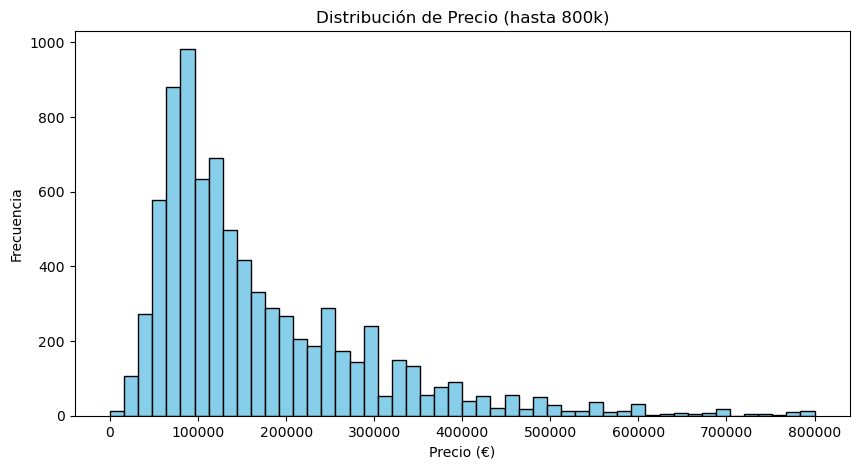

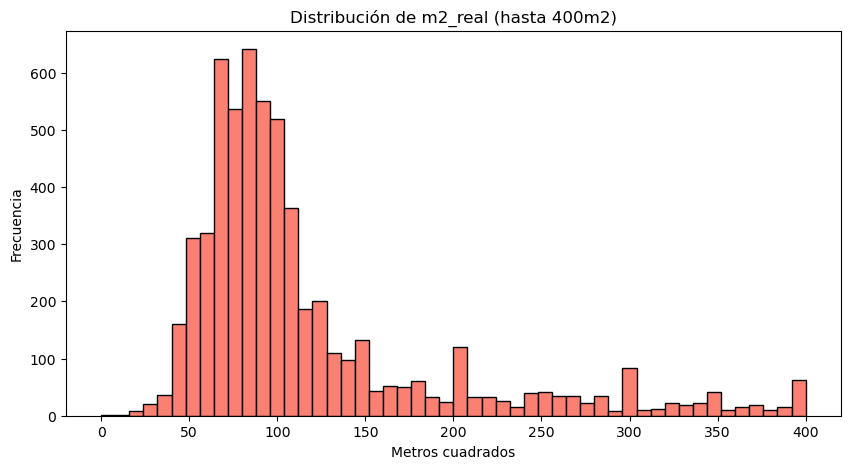

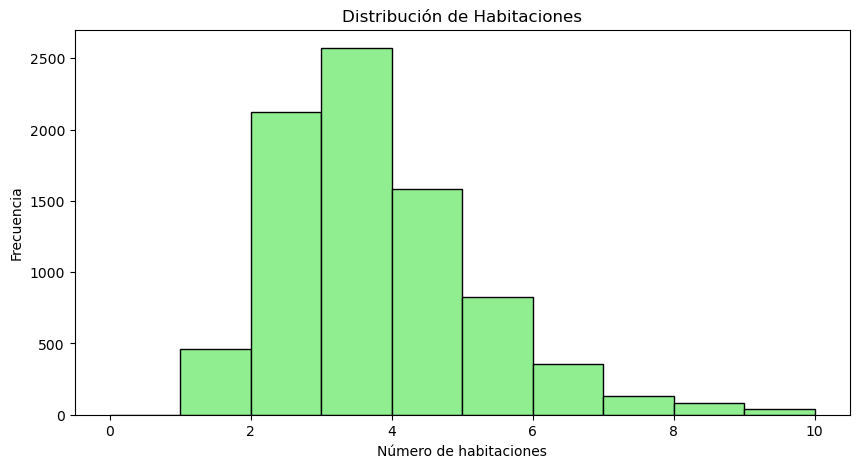

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['m2_real'] = pd.to_numeric(df['m2_real'], errors='coerce')
df['room_num'] = pd.to_numeric(df['room_num'], errors='coerce')

plt.figure(figsize=(10, 5))
plt.hist(df['price'].dropna(), bins=50, range=(0, 800000), color='skyblue', edgecolor='black')
plt.title("Distribución de Precio (hasta 800k)")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['m2_real'].dropna(), bins=50, range=(0, 400), color='salmon', edgecolor='black')
plt.title("Distribución de m2_real (hasta 400m2)")
plt.xlabel("Metros cuadrados")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['room_num'].dropna(), bins=10, range=(0, 10), color='lightgreen', edgecolor='black')
plt.title("Distribución de Habitaciones")
plt.xlabel("Número de habitaciones")
plt.ylabel("Frecuencia")
plt.show()

Shape of the distribution

price y m2_real presentan una distribución sesgada a la derecha

room_num es discreta y ligeramente sesgada

Presence of outliers

Se observan outliers claros en price y m2_real, con valores extremadamente altos

room_num también presenta algunos valores extremos (hasta 30 habitaciones)

Variability

price y m2_real muestran alta variabilidad, confirmada por su desviación estándar

room_num presenta una variabilidad más moderada

## 5. Bivariate and multivariate analysis
Study relationships between pairs of variables:

- **a) Numeric vs numeric**
    - Choose at least two pairs
    - Use scatter plots
    - Comment on:
        - Direction
        - Strength
- **b) Numeric vs categorical**
    - Compare the numeric variable across categories
    - Use appropriate plots
    - Interpret differences between groups
- **c) Multivariate analysis**
    - Combine more than two variables to extract insights.

 - Choose at least two pairs
    - Use scatter plots

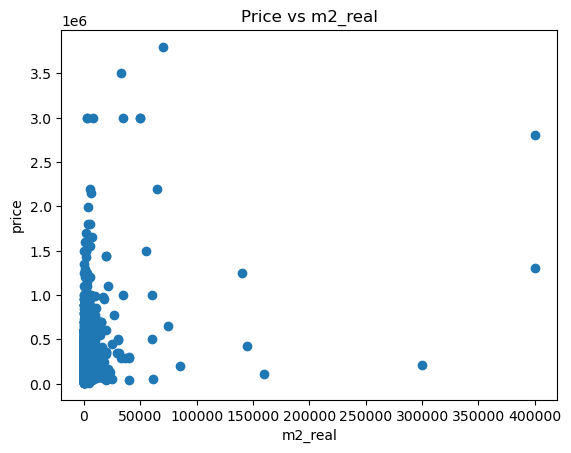

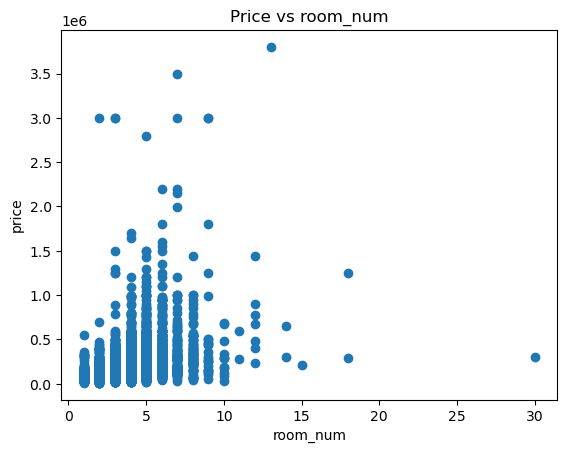

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df_num = df[["price", "m2_real", "room_num"]].apply(pd.to_numeric, errors="coerce")

plt.figure()
plt.scatter(df_num["m2_real"], df_num["price"])
plt.xlabel("m2_real")
plt.ylabel("price")
plt.title("Price vs m2_real")
plt.show()

plt.figure()
plt.scatter(df_num["room_num"], df_num["price"])
plt.xlabel("room_num")
plt.ylabel("price")
plt.title("Price vs room_num")
plt.show()


- Comment on:
        - Direction
        - Strength

Las relaciones analizadas muestran una dirección positiva: el precio aumenta cuando crece la superficie o el número de habitaciones.
La fuerza de la relación es débil para price–m2_real y moderada para price–room_num, con alta dispersión de los datos.

- **b) Numeric vs categorical**
    - Compare the numeric variable across categories
    - Use appropriate plots
    - Interpret differences between groups

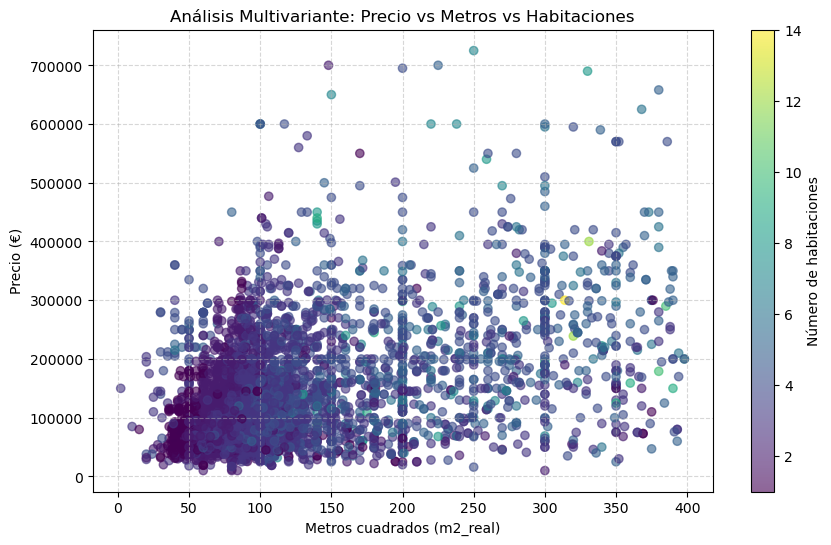

In [21]:
import matplotlib.pyplot as plt

# Filtramos outliers para que el gráfico sea legible
df_multi = df[(df['price'] < 800000) & (df['m2_real'] < 400)].copy()

plt.figure(figsize=(10, 6))

# Usamos 'c' para el color (habitaciones) y un mapa de colores (viridis)
scatter = plt.scatter(df_multi['m2_real'], df_multi['price'], 
                      c=df_multi['room_num'], cmap='viridis', alpha=0.6)

# Añadimos una barra de colores para saber qué significa cada tono
plt.colorbar(scatter, label='Número de habitaciones')

plt.xlabel("Metros cuadrados (m2_real)")
plt.ylabel("Precio (€)")
plt.title("Análisis Multivariante: Precio vs Metros vs Habitaciones")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

El número de habitaciones influye en el precio de la vivienda, pero no lo determina por completo. A medida que aumenta room_num, el precio medio crece, aunque con una dispersión cada vez mayor y presencia de valores extremos.

## 6. Correlation analysis
Compute correlation values between numeric variables

Identify:
- Strong positive correlations
- Strong negative correlations
- Weak or null correlations

 Relate correlations to earlier visual findings

In [22]:
vars_corr = ["price", "m2_real", "m2_useful", "room_num", "bath_num"]

numeric_df = df[vars_corr].apply(pd.to_numeric, errors="coerce")

corr_matrix = numeric_df.corr()

print(corr_matrix)


              price   m2_real  m2_useful  room_num  bath_num
price      1.000000  0.276193   0.693311  0.467082  0.574683
m2_real    0.276193  1.000000   0.202339  0.144534  0.084043
m2_useful  0.693311  0.202339   1.000000  0.740498  0.721121
room_num   0.467082  0.144534   0.740498  1.000000  0.645808
bath_num   0.574683  0.084043   0.721121  0.645808  1.000000


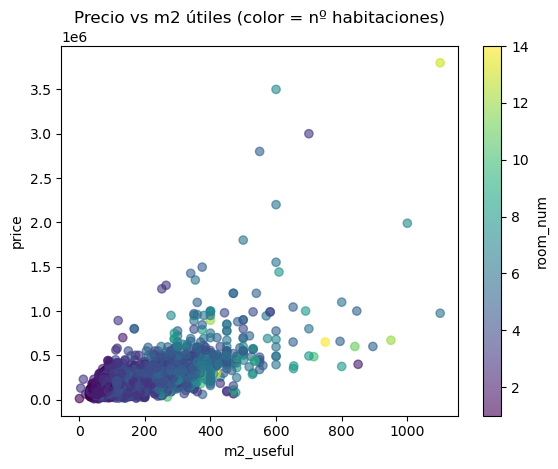

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df_plot = df[["m2_useful", "price", "room_num"]].apply(
    pd.to_numeric, errors="coerce"
).dropna()

plt.figure()
plt.scatter(
    x=df_plot["m2_useful"],
    y=df_plot["price"],
    c=df_plot["room_num"],
    alpha=0.6
)
plt.xlabel("m2_useful")
plt.ylabel("price")
plt.title("Precio vs m2 útiles (color = nº habitaciones)")
plt.colorbar(label="room_num")
plt.show()


# Strong positive correlations

m2_useful – room_num (0.74)

m2_useful – bath_num (0.72)

price – m2_useful (0.69)

Las viviendas con mayor superficie útil tienden a tener más habitaciones y baños, lo que se refleja en precios más elevados.

# Strong negative correlations

No se identifican correlaciones negativas fuertes entre las variables analizadas

# Weak or null correlations

Se observan correlaciones débiles o cercanas a cero en los siguientes pares:

m2_real – bath_num (0.08)

m2_real – room_num (0.14)

price – m2_real (0.28)

Estas relaciones débiles indican que m2_real no explica bien las variaciones en el número de habitaciones, baños o incluso en el precio, probablemente debido a la alta dispersión y presencia de valores extremos.

Los gráficos confirman que m2_useful es una variable más representativa que m2_real para explicar el precio de la vivienda.

## 7. Conclusions

Summarize your main findings:
- Key characteristics of the housing market
- Important relationships between variables
- Limitations of the dataset
- Ideas for further analysis or modeling

Características clave del mercado inmobiliario

El mercado inmobiliario presenta una alta diversidad, con la mayoría de viviendas concentradas en rangos medios de precio y tamaño, y una cola de valores altos que indica la presencia de propiedades muy grandes o caras.

Relaciones importantes entre las variables

El precio se relaciona fuertemente con los metros útiles, el número de habitaciones y los baños. En cambio, los metros reales muestran relaciones más débiles debido a la alta dispersión y a la presencia de valores extremos.

Limitaciones del conjunto de datos

El conjunto de datos contiene valores faltantes, outliers y posibles inconsistencias en algunas variables, lo que puede afectar la fiabilidad de los resultados.

Ideas para análisis o modelado futuros

Se propone realizar una mejor limpieza de datos, tratar los valores atípicos y aplicar modelos predictivos para estimar el precio, incorporando variables como la ubicación o el estado del inmueble.